In [1]:
import numpy as np
import pandas as pd
from scipy import stats
 
# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('btc.csv')
df1.head(5)

,date,begin,high,low,end
0,2018/2/16 15:00,10099.9063,10112.8047,10027.1211,10027.1211
1,2018/2/16 14:00,10002.7793,10145.4453,10002.4316,10099.9063
2,2018/2/16 13:00,10121.5996,10125.2246,9955.7051,10002.7793
3,2018/2/16 12:00,10193.3984,10218.4492,10056.2695,10121.5996
4,2018/2/16 11:00,10300.0098,10300.5430,10167.4785,10193.3984


In [3]:
df1 = df1[['date','end']]
df1.index = pd.to_datetime(df1['date'])
df1.reset_index
df1.head()

,date,end
date,,
2018-02-16 15:00:00,2018/2/16 15:00,10027.1211
2018-02-16 14:00:00,2018/2/16 14:00,10099.9063
2018-02-16 13:00:00,2018/2/16 13:00,10002.7793
2018-02-16 12:00:00,2018/2/16 12:00,10121.5996
2018-02-16 11:00:00,2018/2/16 11:00,10193.3984


In [4]:
df1.sort_index(ascending=True,inplace=True)
df1.drop(columns=['date'],inplace=True)
df1 = df1.interpolate(method='linear')
df1.head()

,end
date,
2017-12-08 07:00:00,16222.5127
2017-12-08 08:00:00,16345.1807
2017-12-08 09:00:00,16892.6250
2017-12-08 10:00:00,17002.8789
2017-12-08 11:00:00,16783.2324


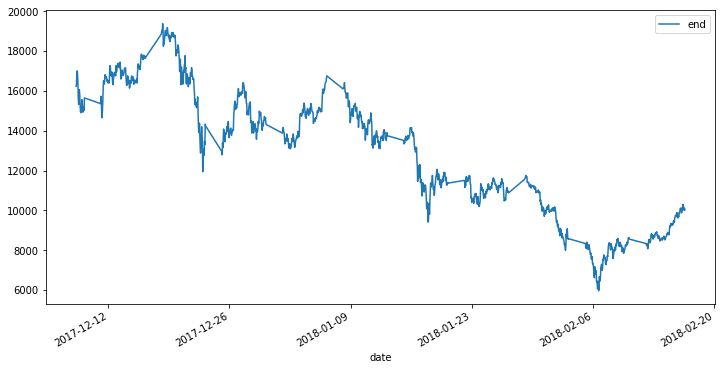

In [5]:
df1.plot(figsize=(12,6))

In [6]:
df1[pd.isnull(df1)['end']]

,end
date,


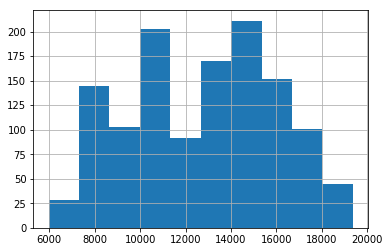

In [7]:
from pandas import Series
from matplotlib import pyplot
series = df1.end
series.hist()
pyplot.show()

In [9]:
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=15514.753456, mean2=10131.588834
variance1=2356668.194895, variance2=3226722.051522


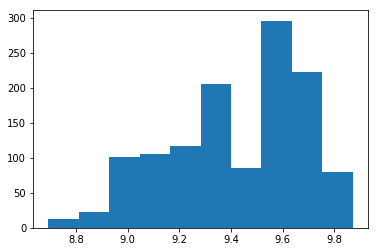

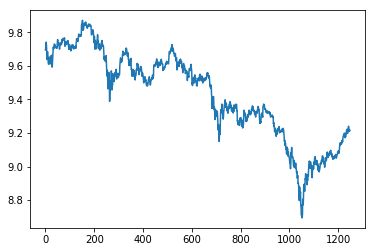

In [11]:
X = series.values
X = np.log(X)


In [12]:
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=9.644728, mean2=9.207376
variance1=0.009573, variance2=0.032572


In [13]:
from statsmodels.tsa.stattools import adfuller
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.014284
p-value: 0.748019
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
X = series.values
X = np.log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.259330
p-value: 0.647567
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


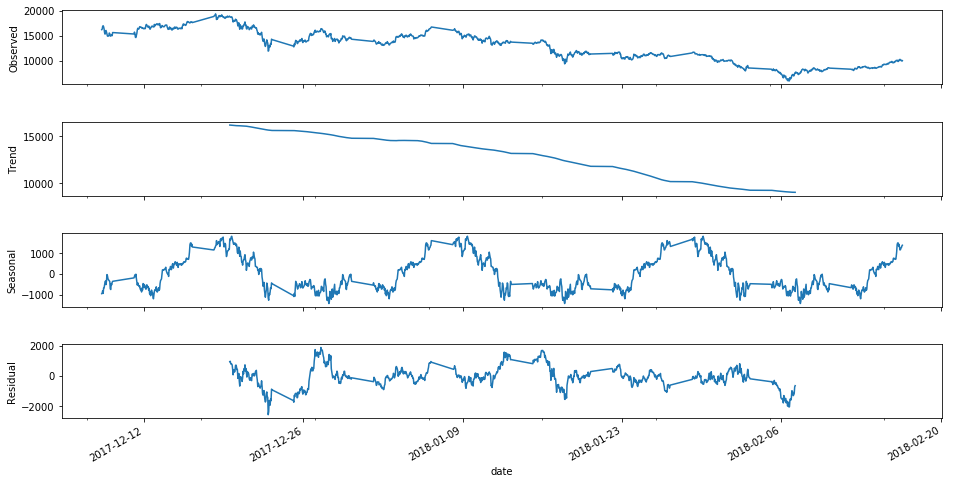

In [21]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df1.end, freq=365)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [25]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


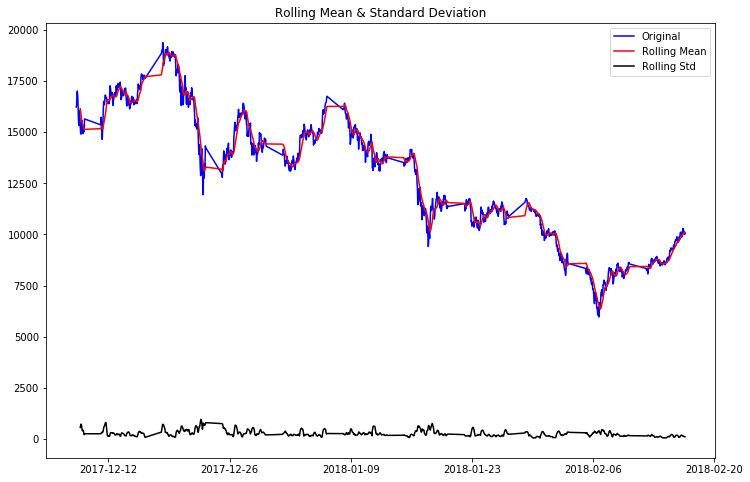

Results of Dickey-Fuller Test:
Test Statistic                   -1.014284
p-value                           0.748019
#Lags Used                        7.000000
Number of Observations Used    1241.000000
Critical Value (1%)              -3.435630
Critical Value (5%)              -2.863872
Critical Value (10%)             -2.568011
dtype: float64


In [26]:
test_stationarity(df1.end)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


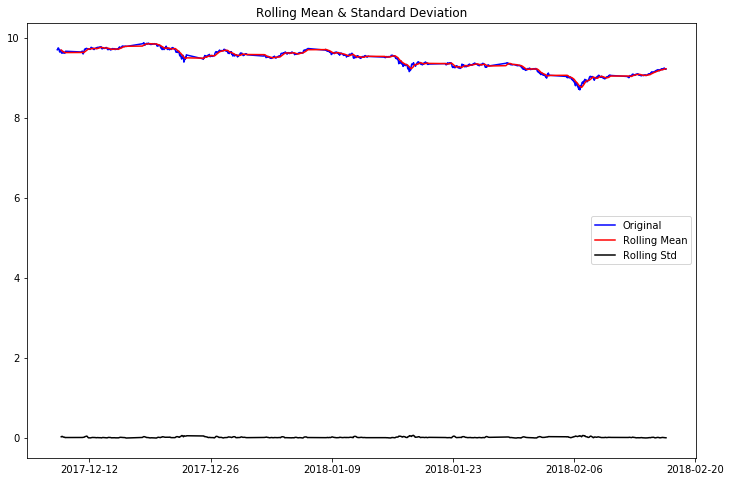

Results of Dickey-Fuller Test:
Test Statistic                   -1.259330
p-value                           0.647567
#Lags Used                        2.000000
Number of Observations Used    1246.000000
Critical Value (1%)              -3.435609
Critical Value (5%)              -2.863862
Critical Value (10%)             -2.568006
dtype: float64


In [27]:
test_stationarity(np.log(df1.end))

In [29]:
testts = df1.end - df1.shift(1).end
testts.head()

date
2017-12-08 07:00:00         NaN
2017-12-08 08:00:00    122.6680
2017-12-08 09:00:00    547.4443
2017-12-08 10:00:00    110.2539
2017-12-08 11:00:00   -219.6465
Name: end, dtype: float64

In [30]:
testts.dropna(inplace=True)
testts.head()

date
2017-12-08 08:00:00    122.6680
2017-12-08 09:00:00    547.4443
2017-12-08 10:00:00    110.2539
2017-12-08 11:00:00   -219.6465
2017-12-08 12:00:00   -435.4101
Name: end, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


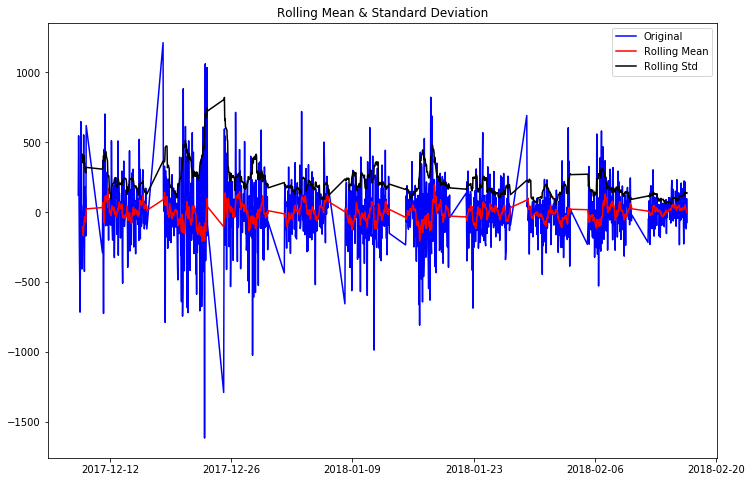

Results of Dickey-Fuller Test:
Test Statistic                -1.500117e+01
p-value                        1.089269e-27
#Lags Used                     6.000000e+00
Number of Observations Used    1.241000e+03
Critical Value (1%)           -3.435630e+00
Critical Value (5%)           -2.863872e+00
Critical Value (10%)          -2.568011e+00
dtype: float64


In [31]:
test_stationarity(testts)

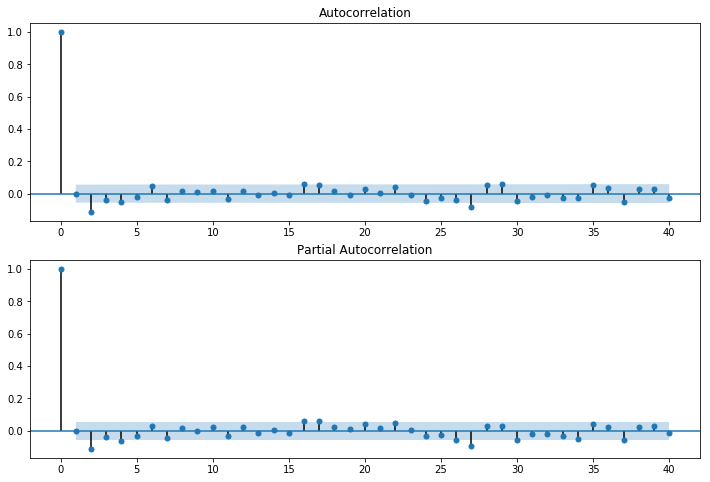

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(testts, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(testts, lags=40, ax=ax2)

In [56]:
mod = sm.tsa.statespace.SARIMAX(df1.end, trend='n', order=(0,1,0), seasonal_order=(1,1,1,7))
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                
Dep. Variable:                               end   No. Observations:                 1249
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 7)   Log Likelihood               -8565.268
Date:                           Tue, 01 May 2018   AIC                          17136.535
Time:                                   13:25:57   BIC                          17151.926
Sample:                               12-08-2017   HQIC                         17142.321
                                    - 02-16-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.0326      0.018     -1.776      0.076      -0.069       0.003
ma.S.L7       -0.9985      0.047    -21.383

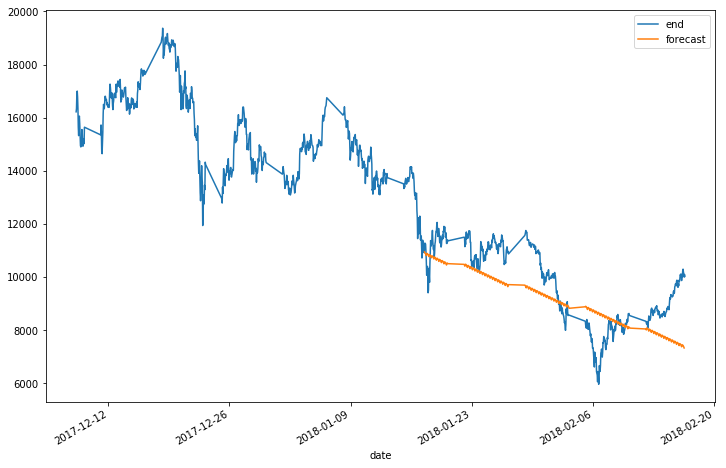

In [57]:
df1['forecast'] = results.predict(start = 702, end= 1246, dynamic= True)  
df1[['end', 'forecast']].plot(figsize=(12, 8))

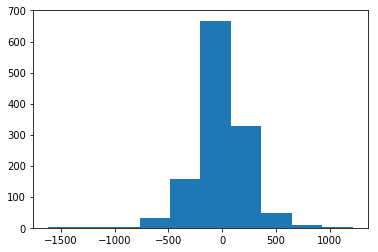

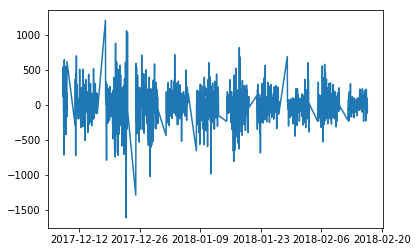

In [58]:
pyplot.hist(testts)
pyplot.show()
pyplot.plot(testts)
pyplot.show()